In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
def add_col(jobs_df, spaced_name):
    spaced_name_lower = spaced_name
    possible_name_list = [spaced_name_lower]
    if spaced_name_lower.count(" ") > 0:
        # If the name has a space, replace with no space, then dash
        possible_name_list.append(spaced_name_lower.replace(" ", ""))
        possible_name_list.append(spaced_name_lower.replace(" ", "-"))
        
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df[spaced_name] = jobs_df["Job Description"].str.contains(contains_regex)


def get_df():
    # Read csv as a df and drop NAs
    jobs_df = pd.read_csv("all_jobs.csv", usecols=range(1,16))

    # Drop rows that have important values as na
    jobs_df = jobs_df[jobs_df["Job Description"].notna()]
    jobs_df = jobs_df[jobs_df["Salary Estimate"].notna()]
    jobs_df = jobs_df[jobs_df["Size"].notna()]
    jobs_df = jobs_df[jobs_df["Location"].notna()]


    # Add columns for the technologies that the job postings include in their description
    technology_list = []
    with open("technologies.txt") as tech_file:
        technology_list = tech_file.read().splitlines()

    for technology in technology_list:
        add_col(jobs_df, technology)
    
    # These two are weird with formatting so add manually
    # Scikit learn
    possible_name_list = ["Scikit learn", "Sci-kit learn", "Sci-kit-learn", "Scikit-learn"]
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df["Scikit learn"] = jobs_df["Job Description"].str.contains(contains_regex)
    # R
    possible_name_list = [" R ", " R, "]
    contains_regex = "(?i)" + "|".join(possible_name_list)
    jobs_df["R"] = jobs_df["Job Description"].str.contains(contains_regex)

    # Turn location into just state
    jobs_df["State"] = jobs_df["Location"].str[-2:]

    # Drop description and unneeded cols
    jobs_df.drop("Job Title", axis=1, inplace=True)
    jobs_df.drop("Job Description", axis=1, inplace=True)
    jobs_df.drop("Rating", axis=1, inplace=True)
    jobs_df.drop("Company Name", axis=1, inplace=True)
    jobs_df.drop("Headquarters", axis=1, inplace=True)
    jobs_df.drop("Founded", axis=1, inplace=True)
    jobs_df.drop("Type of ownership", axis=1, inplace=True)
    jobs_df.drop("Industry", axis=1, inplace=True)
    jobs_df.drop("Sector", axis=1, inplace=True)
    jobs_df.drop("Revenue", axis=1, inplace=True)
    jobs_df.drop("Competitors", axis=1, inplace=True)
    jobs_df.drop("Easy Apply", axis=1, inplace=True)

    
    # Turn Salary and Size to int values
    jobs_df.drop(jobs_df[jobs_df['Size'] == "Unknown"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Size'] == "-1"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Salary Estimate'] == "Unknown"].index, inplace = True)
    jobs_df.drop(jobs_df[jobs_df['Salary Estimate'] == "-1"].index, inplace = True)

    def average_item(item):
        int_list = re.findall('\d+', item)
        int_list = [int(i) for i in int_list]
        return 1000 * sum(int_list) / len(int_list)

    jobs_df["Size"] = np.vectorize(average_item)(jobs_df["Size"])
    jobs_df["Salary Estimate"] = np.vectorize(average_item)(jobs_df["Salary Estimate"])
    
    return jobs_df
    
jobs_df = get_df()

In [93]:
# Fix states
jobs_df.loc[jobs_df["State"] == "te", "State"] = "RT"
jobs_df.loc[jobs_df["State"] == "is", "State"] = "IL"
jobs_df.loc[jobs_df["State"] == "ey", "State"] = "NJ"
jobs_df.loc[jobs_df["State"] == "do", "State"] = "CO"
jobs_df.loc[jobs_df["State"] == "ah", "State"] = "UH"
jobs_df.loc[jobs_df["State"] == "an", "State"] = "MI"
jobs_df.loc[jobs_df["State"] == "co", "State"] = "NM"

jobs_df.loc[jobs_df["Location"] == "Maryland", "State"] = "MD"
jobs_df.loc[jobs_df["Location"] == "Rhode Island", "State"] = "RD"
jobs_df.loc[jobs_df["Location"] == "Georgia", "State"] = "GA"
jobs_df.loc[jobs_df["Location"] == "Pennsylvania", "State"] = "PA"
jobs_df.loc[jobs_df["Location"] == "California", "State"] = "CA"
jobs_df.loc[jobs_df["Location"] == "Virginia", "State"] = "VA"
jobs_df.loc[jobs_df["Location"] == "West Virginia", "State"] = "WV"
jobs_df.loc[jobs_df["Location"] == "Arizona", "State"] = "AZ"
jobs_df.loc[jobs_df["Location"] == "Indiana", "State"] = "IN"
jobs_df.loc[jobs_df["Location"] == "Lousiana", "State"] = "LA"
jobs_df.loc[jobs_df["Location"] == "Montana", "State"] = "MT"
jobs_df.loc[jobs_df["Location"] == "North Carolina", "State"] = "NC"
jobs_df.loc[jobs_df["Location"] == "South Carolina", "State"] = "SC"
jobs_df.loc[jobs_df["Location"] == "Connecticut", "State"] = "CT"
jobs_df.loc[jobs_df["Location"] == "Minnesota", "State"] = "MN"
jobs_df.loc[jobs_df["Location"] == "North Dakota", "State"] = "ND"
jobs_df.loc[jobs_df["Location"] == "South Dakota", "State"] = "SD"
jobs_df.loc[jobs_df["Location"] == "Oklahoma", "State"] = "OK"
jobs_df.loc[jobs_df["Location"] == "Alabama", "State"] = "AL"
jobs_df.loc[jobs_df["Location"] == "Massachusetts", "State"] = "MA"
jobs_df.loc[jobs_df["Location"] == "Arkansas", "State"] = "AR"
jobs_df.loc[jobs_df["Location"] == "Kansas", "State"] = "KS"
jobs_df.loc[jobs_df["Location"] == "Texas", "State"] = "TX"
jobs_df.loc[jobs_df["Location"] == "Oregon", "State"] = "OR"
jobs_df.loc[jobs_df["Location"] == "Washington", "State"] = "WA"

jobs_df.drop(jobs_df[jobs_df['State'] == "da"].index, inplace = True)  # Canada
jobs_df.drop(jobs_df[jobs_df['State'] == "io"].index, inplace = True)  # Ontario
jobs_df.drop(jobs_df[jobs_df['State'] == "es"].index, inplace = True)  # No State
jobs_df.drop(jobs_df[jobs_df['State'] == "om"].index, inplace = True)  # None?

# Drop Location
jobs_df.drop("Location", axis=1, inplace=True)


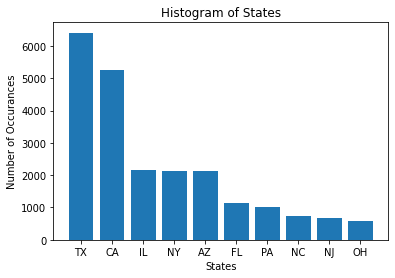

In [95]:
def sort_col_to_arrays(jobs_df, column_name, amt_concated=1):
    x_counts = []
    x_names = []
    for name in jobs_df[column_name].unique():
        num_counts = len(jobs_df[jobs_df[column_name] == name])
        x_counts.append(num_counts)
        x_names.append(name)

    zipped_lists = zip(x_counts, x_names)
    sorted_pairs = sorted(zipped_lists, reverse=True)
    tuples = zip(*sorted_pairs)
    x_counts, x_names = [list(tuple) for tuple in tuples]

    x_counts = x_counts[:int(len(x_counts)/amt_concated)]
    x_names = x_names[:int(len(x_names)/amt_concated)]

    return x_counts, x_names

state_counts, state_names = sort_col_to_arrays(jobs_df, "State", amt_concated=4)

plt.bar(x=state_names, height=state_counts)
plt.title("Histogram of States")
plt.xlabel("States")
plt.ylabel("Number of Occurances")
plt.show()

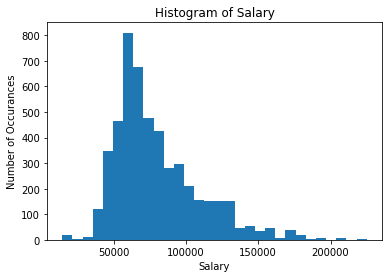

In [96]:
plt.hist(test_df["Salary Estimate"], bins=30)
plt.title("Histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Occurances")
plt.show()

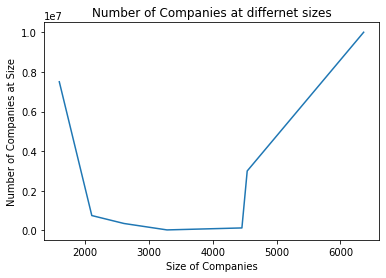

In [97]:
labels, counts = sort_col_to_arrays(jobs_df, "Size")
plt.plot(labels, counts)
plt.title("Number of Companies at differnet sizes")
plt.xlabel("Size of Companies")
plt.ylabel("Number of Companies at Size")
plt.show()

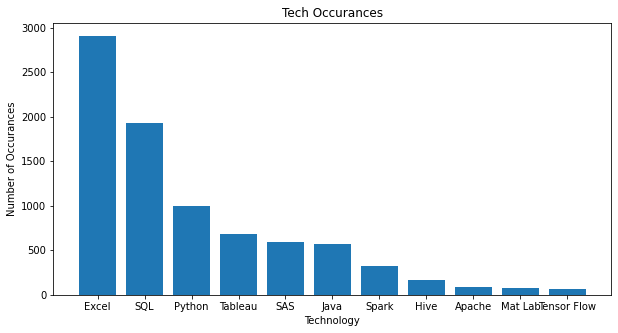

In [98]:
technology_list = []
count_list = []
with open("technologies.txt") as tech_file:
    technology_list = tech_file.read().splitlines()
    
for tech in technology_list:
    count_list.append(test_df[tech].sum())

zipped_lists = zip(count_list, technology_list)
sorted_pairs = sorted(zipped_lists, reverse=True)
tuples = zip(*sorted_pairs)
x_counts, x_names = [list(tuple) for tuple in tuples]
x_counts = x_counts[:int(len(x_counts)/2)]
x_names = x_names[:int(len(x_names)/2)]
    
plt.figure(figsize=(10,5))
plt.bar(x=x_names, height=x_counts)
plt.title("Tech Occurances")
plt.xlabel("Technology")
plt.ylabel("Number of Occurances")
plt.show()

In [104]:
print(jobs_df.columns)
jobs_df = pd.get_dummies(jobs_df, columns=["State"])
print(jobs_df.columns)

Index(['Salary Estimate', 'Size', 'Tensor Flow', 'Python', 'SQL', 'Java',
       'SAS', 'Hive', 'Mat Lab', 'Ruby', 'Tableau', 'Py Torch', 'Rapid Miner',
       'Apache', 'Spark', 'D3.js', 'Excel', 'ggplot2', 'Jupyter',
       'Mat plot lib', 'NLTK', 'Numpy', 'Pandas', 'Keras', 'Octave',
       'Scikit learn', 'R', 'State'],
      dtype='object')
Index(['Salary Estimate', 'Size', 'Tensor Flow', 'Python', 'SQL', 'Java',
       'SAS', 'Hive', 'Mat Lab', 'Ruby', 'Tableau', 'Py Torch', 'Rapid Miner',
       'Apache', 'Spark', 'D3.js', 'Excel', 'ggplot2', 'Jupyter',
       'Mat plot lib', 'NLTK', 'Numpy', 'Pandas', 'Keras', 'Octave',
       'Scikit learn', 'R', 'State_AK', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_MI', 'State_MN', 'State_MO', 'State_NC', 'State_NE',
       'State_NJ', 'State_NM', 'State_NV', 'State_N

In [105]:
mask = np.random.rand(len(jobs_df)) < 0.8
train_df = jobs_df[mask]
test_df = jobs_df[~mask]